In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
sp.init_printing(order='grlex')

# Símbolos
w0, k, m, t, gama = sp.symbols("omega0, k, m, t, Y")

#Funções
x = sp.Function('x')

Oscilador Harmônico Simples

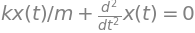

In [2]:
# Equações
eqx = sp.Eq(x(t).diff(t,2) + (k/m)*x(t), 0)
eqw0 = sp.Eq(w0**2, k/m)
eqx

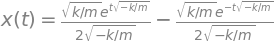

In [3]:
# Solução
sol1 = sp.dsolve(eqx, ics={x(0):0, x(t).diff(t,1).subs(t,0): sp.sqrt(k/m)})
sol1

Oscilador Harmônico Amortecido

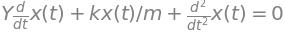

In [4]:
#Equação
eqx2 = sp.Eq(x(t).diff(t,2) + gama*x(t).diff(t,1) + (k/m)*x(t), 0)
eqx2

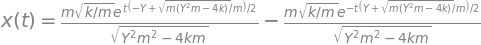

In [5]:
# Solução
sol2 = sp.dsolve(eqx2, ics={x(0):0, x(t).diff(t,1).subs(t,0): sp.sqrt(k/m)})
sol2


Plotando coisas:

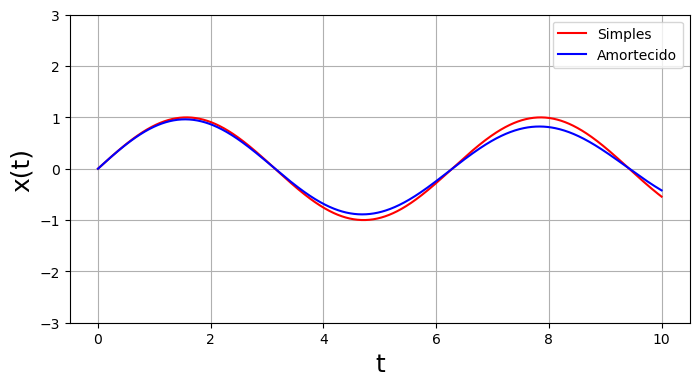

In [26]:
import numpy as np
import matplotlib.pyplot as plt

k1 = 1
m1 = 1
tl = np.linspace(0, 10, 1000)

###Simples
y_t = sp.lambdify(t, sol1.rhs.subs({k:k1, m:m1}), "numpy")
Yp1 = y_t(tl).real



###Amortecido
y_t2 = sp.lambdify(t, sol2.rhs.subs({k:k1, m:m1, gama:0.05}))
Yp2 = y_t2(tl).real


fig, ax = plt.subplots(figsize=(8,4))
ax.set_ylim(-3, 3)

ax.plot(tl, Yp1, color='red', label='Simples')
ax.plot(tl, Yp2, color='blue', label='Amortecido')

ax.set_ylabel('x(t)', fontsize=18)
ax.set_xlabel('t', fontsize=18)
plt.legend()
plt.grid()
plt.show()
